In [1]:
#imports
import numpy as np
import astropy 
from astropy.io import ascii
from astropy.table import Table, Column, join, vstack
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.coordinates import SkyCoord
%matplotlib inline

In [2]:
#read in files
Fang = ascii.read('../../OrionCatalogs/orionCatalogFang.tsv')
Megeath = ascii.read('../../OrionCatalogs/orionCatalogMegeath.tsv')
Koenig = ascii.read('../../KoenigSelectedCatalogs/Orion/SelectionV2/CottleIR_Excess_Selection_v2.txt')

In [3]:
#impose a 7 < H < 13.0 cut on all catalogs
#The lists returned are for the original array as the indices
#are passed directly to the new lists. Call: Megeath[MegeathMag]
KoenigMag = []
for i in range(len(Koenig)):
    if Koenig['h_m_2mass'][i] > 7.0 and Koenig['h_m_2mass'][i] < 13.0:
        KoenigMag.append(i)
print len(Koenig)
print len(KoenigMag)

MegeathMag = []
for i in range(len(Megeath)):
    if i > 3: 
        if float(Megeath['Hmag'][i]) > 7.0 and float(Megeath['Hmag'][i]) < 13.0:
            MegeathMag.append(i)
        
FangMag = []
for i in range(len(Fang)):
    if i > 3: 
        if float(Fang['Hmag'][i]) > 7.0 and float(Fang['Hmag'][i]) < 13.0:
            FangMag.append(i)
        
print len(Megeath)
print len(MegeathMag)

print len(Fang)
print len(FangMag)

2699
1729
3481
1706
1390
708


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/ma/core.py:3838: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [4]:
#find the indices of the class 1 and class 2 objects in each catalog 
#(from those that meet the mag cuts)
#The lists returned are for the original array as the indices from the magnitude cuts
#are passed directly to the new lists. Call: Megeath[MegeathI]
FangI = []
FangII = []
for i in FangMag:
    if Fang['Class'][i]=='I':
        FangI.append(i)
    if Fang['Class'][i]== 'II':
        FangII.append(i)

        
MegeathI = []
MegeathII = []       
for i in MegeathMag:
    if i > 2:
        if Megeath['Cl'][i]=='P':
            MegeathI.append(i)
        if Megeath['Cl'][i]== 'D':
            MegeathII.append(i)

KoenigI = []
KoenigII = []
for i in KoenigMag:
    if Koenig['Class'][i]=='I':
        KoenigI.append(i)
    if Koenig['Class'][i]== 'II':
        KoenigII.append(i)
        
print len(KoenigI)
print len(KoenigII)
print len(FangI)
print len(FangII)
print len(MegeathI)
print len(MegeathII)

51
1678
2
253
57
1649


In [5]:
#match the koenig and Fang/Megeath catalogs by class
#matchCatalog returns the indices of the second catalog that coorespond to matches in the 
#first. Since the catalogs are based off the class lists, the indices are dependent
#on the list of sources for each class. 
#Call: Megeath[MegeathI][Mclass1Koenig] or Koenig[KoenigMag][Kclass1Fang]
from matchCatalog import matchCatalog
FangCoordI = SkyCoord(Fang['_RAJ2000'][FangI], Fang['_DEJ2000'][FangI], unit='deg')
FangCoordII = SkyCoord(Fang['_RAJ2000'][FangII], Fang['_DEJ2000'][FangII], unit='deg')

KoenigCoord = SkyCoord(Koenig['ra'][KoenigMag], Koenig['dec'][KoenigMag], unit = 'deg')

MegeathCoordI = SkyCoord(Megeath['_RAJ2000'][MegeathI], Megeath['_DEJ2000'][MegeathI], unit='deg')
MegeathCoordII = SkyCoord(Megeath['_RAJ2000'][MegeathII], Megeath['_DEJ2000'][MegeathII], unit='deg')

#gives Koenig indices
Kclass1Fang, dist1F = matchCatalog(FangCoordI, KoenigCoord, 3.0, False)
Kclass2Fang, dist2F = matchCatalog(FangCoordII, KoenigCoord,  3.0, False)

Kclass1Megeath, dist1M = matchCatalog(MegeathCoordI, KoenigCoord, 3.0, False)
Kclass2Megeath, dist2M = matchCatalog(MegeathCoordII, KoenigCoord, 3.0, False)

#gives Megeath/Fang indices
Mclass1Koenig, dist1KM = matchCatalog(KoenigCoord, MegeathCoordI, 3.0, False)
Mclass2Koenig, dist2KM = matchCatalog(KoenigCoord, MegeathCoordII, 3.0, False)

Fclass1Koenig, dist1KF = matchCatalog(KoenigCoord, FangCoordI, 3.0, False)
Fclass2Koenig, dist2KF = matchCatalog(KoenigCoord, FangCoordII, 3.0, False)

In [6]:
#some comparison statistics
#calculates and prints out the number of sources in the catalogs, number found, percentages
class1Ratio = round(float(len(KoenigI))/(len(FangI)+len(MegeathI)), 4)
class2Ratio = round(float(len(KoenigII))/(len(FangII)+len(MegeathII)), 4)
                

print 'Ratio of Koenig Selected sources over number of sources in the Fang and Megeath Catalogs:'
print 'Class1: ', class1Ratio
print 'Class2: ', class2Ratio

print 'NOW with Fang and Megeath applied to APOGEE limits!'
print '\nFang YSOs selected by Koenig'
print 'Class1:\n', 'Total Fang: ', len(FangI), '\t Found by Koenig: ', len(Kclass1Fang)
print 'Class2:\n', 'Total Fang: ', len(FangII), '\t Found by Koenig: ', len(Kclass2Fang)

print '\nMegeath YSOs selected by Koenig'
print 'Class1:\n', 'Total Megeath: ', len(MegeathI), '\t Found by Koenig: ', len(Kclass1Megeath)
print 'Class2:\n', 'Total Megeath: ', len(MegeathII), '\t Found by Koenig: ', len(Kclass2Megeath)

print '\nRatio matching to Koenig (Matches/KoenigClass):'
print 'Class1: ', round(float(len(Kclass1Fang)+len(Kclass1Megeath))/len(KoenigI), 4)*100
print 'Class2: ', round(float(len(Kclass2Fang)+len(Kclass2Megeath))/len(KoenigII), 4)*100

print '\nRatio matching to Fang+Megeath (Matches/CatalogClass):'
print 'Fang:'
print 'Class1: ', round(float(len(Kclass1Fang))/(len(FangI)), 4)*100
print 'Class2: ', round(float(len(Kclass2Fang))/(len(FangII)), 4)*100
print 'Megeath:'
print 'Class1: ', round(float(len(Kclass1Megeath))/(len(MegeathI)), 4)*100
print 'Class2: ', round(float(len(Kclass2Megeath))/(len(MegeathII)), 4)*100
print '\n Total Koenig matches:', round(float(len(Kclass1Fang)+len(Kclass2Fang)+len(Kclass1Megeath)+len(Kclass2Megeath))/len(KoenigMag), 4)*100


CompleteFang1 = 'Cl 1 Fang: '+ str(round(float(len(Kclass1Fang))/(len(FangI)), 4)*100)+'%'
CompleteFang2 = 'Cl 2 Fang: '+str(round(float(len(Kclass2Fang))/(len(FangII)), 4)*100)+'%'

CompleteM1 = 'Cl 1 Megeath: '+str(round(float(len(Kclass1Megeath))/(len(MegeathI)), 4)*100)+'%'
CompleteM2 = 'Cl 2 Megeath: '+str(round(float(len(Kclass2Megeath))/(len(MegeathII)), 4)*100)+'%'

Contaminants1 = 'Cl 1: '+str(round(float(len(Kclass1Fang)+len(Kclass1Megeath))/len(KoenigI), 4)*100)+'%'
Contaminants2 = 'Cl 2: '+str(round(float(len(Kclass2Fang)+len(Kclass2Megeath))/len(KoenigII), 4)*100)+'%'

KoenigTotal = 'All Matches/All Koenig: ' +str(round(float(len(Kclass1Fang)+len(Kclass2Fang)+len(Kclass1Megeath)+len(Kclass2Megeath))/len(KoenigMag), 4)*100)+'%'      

Ratio of Koenig Selected sources over number of sources in the Fang and Megeath Catalogs:
Class1:  0.8644
Class2:  0.8822
NOW with Fang and Megeath applied to APOGEE limits!

Fang YSOs selected by Koenig
Class1:
Total Fang:  2 	 Found by Koenig:  1
Class2:
Total Fang:  253 	 Found by Koenig:  221

Megeath YSOs selected by Koenig
Class1:
Total Megeath:  57 	 Found by Koenig:  25
Class2:
Total Megeath:  1649 	 Found by Koenig:  818

Ratio matching to Koenig (Matches/KoenigClass):
Class1:  50.98
Class2:  61.92

Ratio matching to Fang+Megeath (Matches/CatalogClass):
Fang:
Class1:  50.0
Class2:  87.35
Megeath:
Class1:  43.86
Class2:  49.61

 Total Koenig matches: 61.6


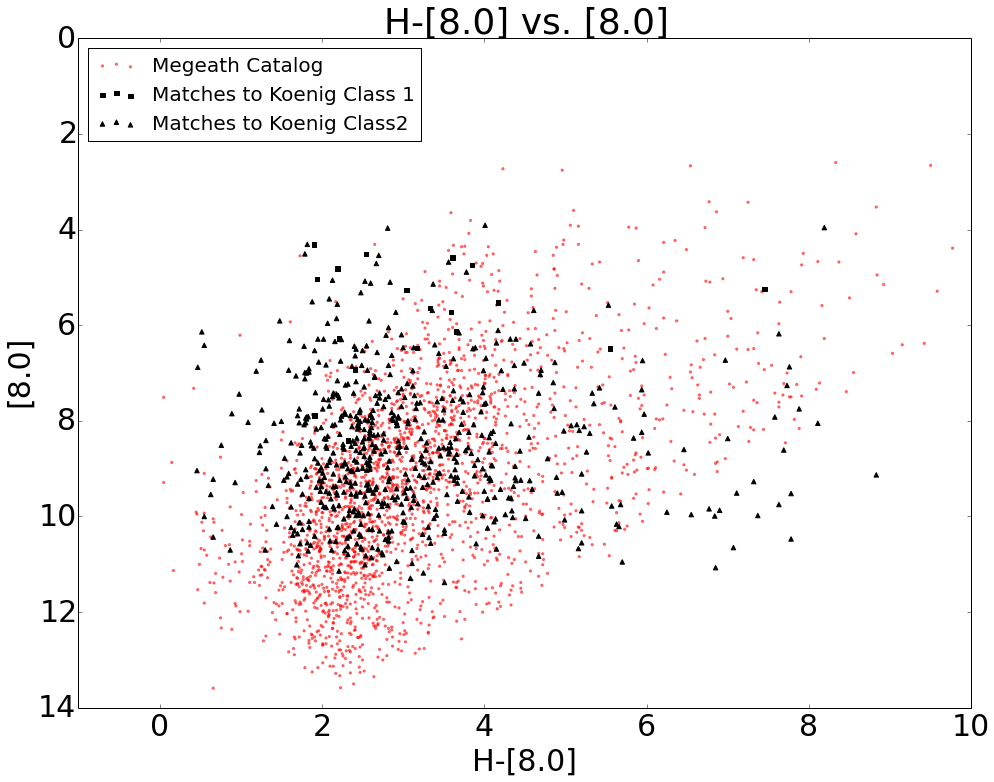

In [7]:
#inverse k-w2 vs k plot
#make k-w2 vs k plot for the Koenig selected
#plt.plot([0.4,0.4],[18,6])
k_m = []
for i in range(len(Megeath)): 
    if i > 1: 
        k_m.append(float(Megeath['Hmag'][i])-float(Megeath['[8.0]'][i]))
    
k_m = np.array(k_m)


plt.scatter(k_m, Megeath['[8.0]'][2:], marker = '.', color = 'red', alpha = 0.5)
#plt.scatter(k_m[MegeathMag], Megeath['[8.0]'][MegeathMag], marker = '.', color = 'red', alpha = 0.5)
#plt.scatter(k_m[have8], Megeath['[8.0]'][have8], marker = '.', color = 'green')
plt.scatter(k_m[MegeathI][Mclass1Koenig], Megeath['[8.0]'][MegeathI][Mclass1Koenig], marker = 's', color = 'black')
plt.scatter(k_m[MegeathII][Mclass2Koenig], Megeath['[8.0]'][MegeathII][Mclass2Koenig], marker = '^', color = 'black')




plt.legend(('Megeath Catalog', 'Matches to Koenig Class 1', 'Matches to Koenig Class2'), loc=2, fontsize = 20)
plt.title('H-[8.0] vs. [8.0]')
plt.xlim(-1,10)
plt.ylim(14,0)
plt.xlabel('H-[8.0]')
plt.ylabel('[8.0]')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(16, 12)
#fig.savefig('../../KoenigSelectedCatalogs/Orion/H-8_vs_8_Megeath.pdf')

In [11]:
#find the number of Megeath sources that have H - [8.0] < 1.5
blueMegeath = []
for i in k_m:
        if i < 1.5:
            blueMegeath.append(i)
        
print len(blueMegeath)

95


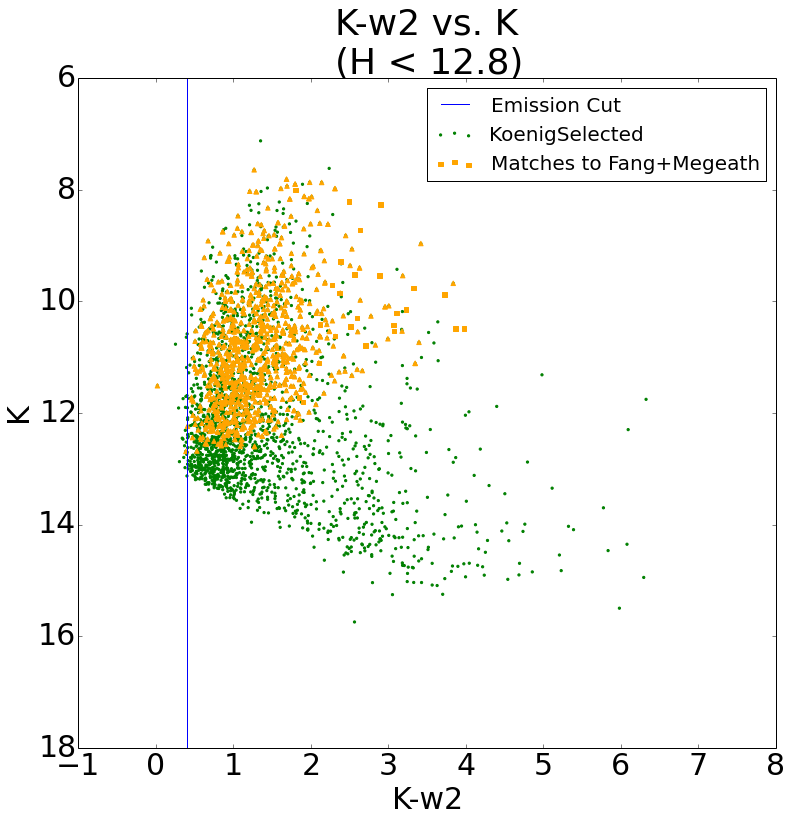

In [12]:
#make k-w2 vs k plot for the Koenig selected
plt.plot([0.4,0.4],[18,6])
plt.scatter(Koenig['k_m_2mass']-Koenig['w2_m'], Koenig['k_m_2mass'], marker = '.', color = 'green')
plt.scatter(Koenig['k_m_2mass'][KoenigMag][Kclass1Fang]-Koenig['w2_m'][KoenigMag][Kclass1Fang], Koenig['k_m_2mass'][KoenigMag][Kclass1Fang], marker = 's', color = 'orange')
plt.scatter(Koenig['k_m_2mass'][KoenigMag][Kclass2Fang]-Koenig['w2_m'][KoenigMag][Kclass2Fang], Koenig['k_m_2mass'][KoenigMag][Kclass2Fang], marker = '^', color = 'orange')
plt.scatter(Koenig['k_m_2mass'][KoenigMag][Kclass1Megeath]-Koenig['w2_m'][KoenigMag][Kclass1Megeath], Koenig['k_m_2mass'][KoenigMag][Kclass1Megeath], marker = 's', color = 'orange')
plt.scatter(Koenig['k_m_2mass'][KoenigMag][Kclass2Megeath]-Koenig['w2_m'][KoenigMag][Kclass2Megeath], Koenig['k_m_2mass'][KoenigMag][Kclass2Megeath], marker = '^', color = 'orange')



plt.legend(('Emission Cut','KoenigSelected', 'Matches to Fang+Megeath'), loc=1, fontsize = 20)
plt.title('K-w2 vs. K\n(H < 12.8)')
plt.xlim(-1,8)
plt.ylim(18,6)
plt.xlabel('K-w2')
plt.ylabel('K')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)
#fig.savefig('../../KoenigSelectedCatalogs/Orion/K-w2_vs_K_EmissionCut12-8.pdf')

In [13]:
#which megeath sources have magnitudes for Spitzer 8.0?
#This must be done before any of the masks in the Megeath catalog have been changed
#(see magnitude histograms), the if statement depends on values to be masked. 
have8 = []
no8 = []        
for i in MegeathMag:
    if i > 1 and i < 3478:
        if float(Megeath['[8.0]'][i]) > -15.0:
            have8.append(i)
        else:
            no8.append(i)
            
print len(have8)
print len(no8)

1397
308


In [14]:
#see if the matches to Koenig conincide with the Megeaths that have Spitzer 8.0
have8RaDec = SkyCoord(Megeath['_RAJ2000'][have8], Megeath['_DEJ2000'][have8], unit = 'deg')
match1 = SkyCoord(Megeath['_RAJ2000'][MegeathI][Mclass1Koenig], Megeath['_DEJ2000'][MegeathI][Mclass1Koenig], unit = 'deg')
match2 = SkyCoord(Megeath['_RAJ2000'][MegeathII][Mclass2Koenig], Megeath['_DEJ2000'][MegeathII][Mclass2Koenig], unit = 'deg')

matches, dist = matchCatalog(match2, have8RaDec, 3.0, False)
print len(matches)
print len(have8RaDec)

803
1397


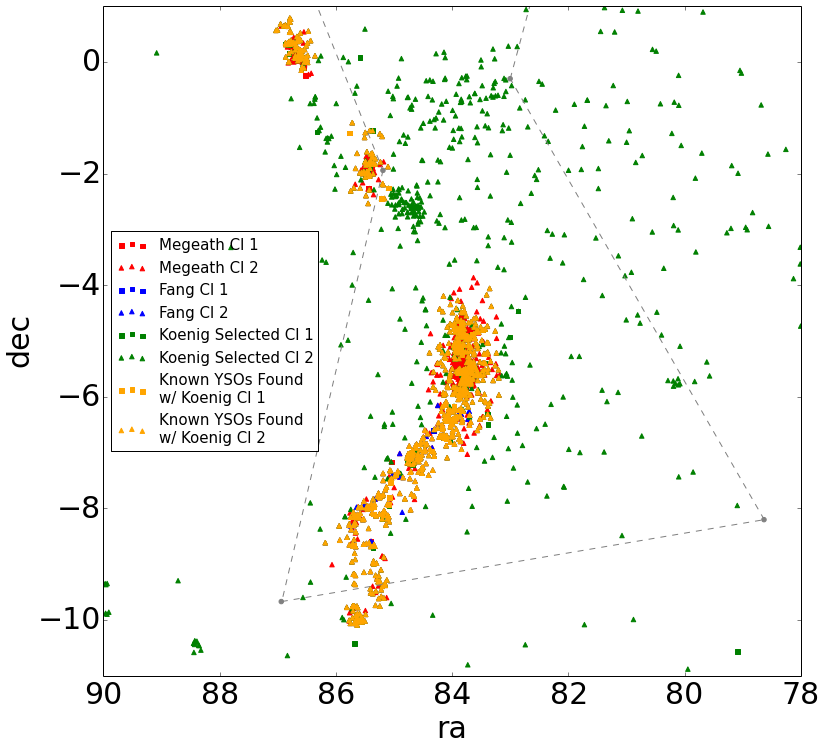

In [12]:
#plot spatially the two catalogs along with the Koenig selection and matches
plt.scatter(Megeath['_RAJ2000'][MegeathI], Megeath['_DEJ2000'][MegeathI], marker = 's', color = 'red')
plt.scatter(Megeath['_RAJ2000'][MegeathII], Megeath['_DEJ2000'][MegeathII], marker = '^', color = 'red')

plt.scatter(Fang['_RAJ2000'][FangI], Fang['_DEJ2000'][FangI], marker = 's', color = 'blue')
plt.scatter(Fang['_RAJ2000'][FangII], Fang['_DEJ2000'][FangII], marker = '^', color = 'blue')

plt.scatter(Koenig['ra'][KoenigI], Koenig['dec'][KoenigI], marker = 's', color = 'green')
plt.scatter(Koenig['ra'][KoenigII], Koenig['dec'][KoenigII], marker = '^', color = 'green')

plt.scatter(Fang['_RAJ2000'][FangI][Fclass1Koenig], Fang['_DEJ2000'][FangI][Fclass1Koenig], marker = 's', color = 'orange')
plt.scatter(Fang['_RAJ2000'][FangII][Fclass2Koenig], Fang['_DEJ2000'][FangII][Fclass2Koenig], marker = '^', color = 'orange')
plt.legend(('Megeath Cl 1', 'Megeath Cl 2', 'Fang Cl 1', 'Fang Cl 2', 'Koenig Selected Cl 1', 'Koenig Selected Cl 2', 
            'Known YSOs Found \nw/ Koenig Cl 1','Known YSOs Found \nw/ Koenig Cl 2'), loc = 6, fontsize = 15)
#plt.plot([20,20], [20,20], color = 'black', linestyle = 'dashed')
#plt.legend(( 'APOGEE-2 fields', 'Koenig Selected Class 1', 'Koenig Selected Class 2'), loc = 4, fontsize = 15)

plt.scatter(Megeath['_RAJ2000'][MegeathI][Mclass1Koenig], Megeath['_DEJ2000'][MegeathI][Mclass1Koenig], marker = 's', color = 'orange')
plt.scatter(Megeath['_RAJ2000'][MegeathII][Mclass2Koenig], Megeath['_DEJ2000'][MegeathII][Mclass2Koenig], marker = '^', color = 'orange')

#plt.scatter(Megeath['_RAJ2000'][no8], Megeath['_DEJ2000'][no8], marker = '.', color = 'black')



#Orion pointer stars
plt.scatter([88.792939, 78.634467, 81.282763, 83.001667, 85.189694, 86.939120], 
            [7.407064, -8.201638, 6.349703, -0.299095,  -1.942574, -9.669605], color = 'grey')
plt.plot([88.79,85.189], [7.407, -1.9425], color = 'grey', linestyle = 'dashed')
plt.plot([85.189,86.93], [-1.9425, -9.669], color = 'grey', linestyle = 'dashed')
plt.plot([86.93, 78.63], [ -9.669, -8.2016], color = 'grey', linestyle = 'dashed')
plt.plot([78.63, 83.00], [  -8.2016, -0.299], color = 'grey', linestyle = 'dashed')
plt.plot([83.00, 81.28], [ -0.299, 6.34], color = 'grey', linestyle = 'dashed')
plt.plot([ 81.28, 88.79], [ 6.34, 7.407], color = 'grey', linestyle = 'dashed')
circle6=plt.Circle((84.66,-2.75),0.65,color='#4c7cff', fill = False)
fig = plt.gcf()
#fig.gca().add_artist(circle6)

#plt.annotate('Sigma Ori', xy=(89.8, -1.0), color = '#4c7cff', fontsize = 23)
#plt.plot([87.7,85.0],[-0.9,-2.65], color = '#4c7cff')

#plt.annotate('Completeness(Matches/Catalog):', xy=(89.8, -3), color = 'black', fontsize = 15)
#plt.annotate(CompleteFang1, xy=(89.8, -3.5), color = 'black', fontsize = 15)
#plt.annotate(CompleteFang2, xy=(89.8, -4), color = 'black', fontsize = 15)
#plt.annotate(CompleteM1, xy=(89.8, -4.5), color = 'black', fontsize = 15)
#plt.annotate(CompleteM2, xy=(89.8, -5), color = 'black', fontsize = 15)
#plt.annotate('Matches/KoenigCount:', xy=(89.8, -6), color = 'black', fontsize = 15)
#plt.annotate(Contaminants1, xy=(89.8, -6.5), color = 'black', fontsize = 15)
#plt.annotate(Contaminants2, xy=(89.8, -7), color = 'black', fontsize = 15)
#plt.annotate(KoenigTotal, xy=(89.8, -8), color = 'black', fontsize = 15)
#total = 'Koenig Total: '+str(len(KoenigMag))
#plt.annotate(total, xy=(89.8,-8.5), color = 'black', fontsize = 15)



#APOGEE2 Circles
#6 visit OrionB fields
circle6=plt.Circle((86.66,0.1379),1.5,color='black', fill = False, linestyle = 'dashed')
circle7=plt.Circle((85.415,-2.124),1.5,color='black', fill = False, linestyle = 'dashed')
#3 visit OrionOB1AB fields
circle8=plt.Circle((84.099,-2.201),1.5,color='black', fill = False, linestyle = 'dashed')
circle9=plt.Circle((84.0,0.7),1.5,color='black', fill = False, linestyle = 'dashed')
circle10=plt.Circle((82.502,-1.5011),1.5,color='black', fill = False, linestyle = 'dashed')
circle11=plt.Circle((80.697,-1.798),1.5,color='black', fill = False, linestyle = 'dashed')
circle12=plt.Circle((81.496,1.005),1.5,color='black', fill = False, linestyle = 'dashed')
circle13=plt.Circle((82.001,3.005),1.5,color='black', fill = False, linestyle = 'dashed')
#circle14=plt.Circle((84.517,-7.034),1.5,color='#ea0fd5', fill = False, linestyle = 'dashed')
#OrionL1641 fields (covered by APOGEE1 circles, so color doesn't matter)
circle15=plt.Circle((84.1, -5.1),1.5,color='black', fill = False, linestyle ='dashed')
circle16=plt.Circle((83.55, -5.3),1.5,color= 'black', fill = False, linestyle = 'dashed')
circle17=plt.Circle((84.25, -6.9),1.5,color='black', fill = False, linestyle = 'dashed')
circle18=plt.Circle((84.5, -7.2),1.5,color='black', fill = False, linestyle = 'dashed')
circle19=plt.Circle((85.2, -8.7),1.5,color='black', fill = False, linestyle = 'dashed')
#6-visit LambdaOriA field
circle25=plt.Circle((84.133, 10.345),1.5,color='black', fill = False, linestyle = 'dashed')
#3-visit LambdaOriB+C fields
circle26=plt.Circle((82.348, 11.723),1.5,color='black', fill = False, linestyle = 'dashed')
circle27=plt.Circle((86.611, 8.993 ),1.5,color='black', fill = False, linestyle = 'dashed')

#fig.gca().add_artist(circle6)
#fig.gca().add_artist(circle7)
#fig.gca().add_artist(circle8)
#fig.gca().add_artist(circle9)
#fig.gca().add_artist(circle10)
#fig.gca().add_artist(circle11)
#fig.gca().add_artist(circle12)
#fig.gca().add_artist(circle13)
#fig.gca().add_artist(circle14)
#fig.gca().add_artist(circle15)
#fig.gca().add_artist(circle16)
#fig.gca().add_artist(circle17)
#fig.gca().add_artist(circle18)
#fig.gca().add_artist(circle19)
#fig.gca().add_artist(circle25)
#fig.gca().add_artist(circle26)
#fig.gca().add_artist(circle27)


#plt.title('Spatial Plot(H < 12.8): \n 3 arcsec matching radius')
#plt.title('Koenig Selected Catalog: Orion')
#plt.xlim(90, 75)
#plt.ylim(-13, 15)
plt.xlim(90 ,78)
plt.ylim(-11, 1)
plt.xlabel('ra')
plt.ylabel('dec')
fig = plt.gcf()
plt.rc('font', size = 30)
#fig.set_size_inches(12, 20)
fig.set_size_inches(12.5, 12)
#fig.savefig('../../KoenigSelectedCatalogs/Orion/SelectionV2/spatial_Koenig_Fang_Megeath_3arcsecond_v2.pdf')

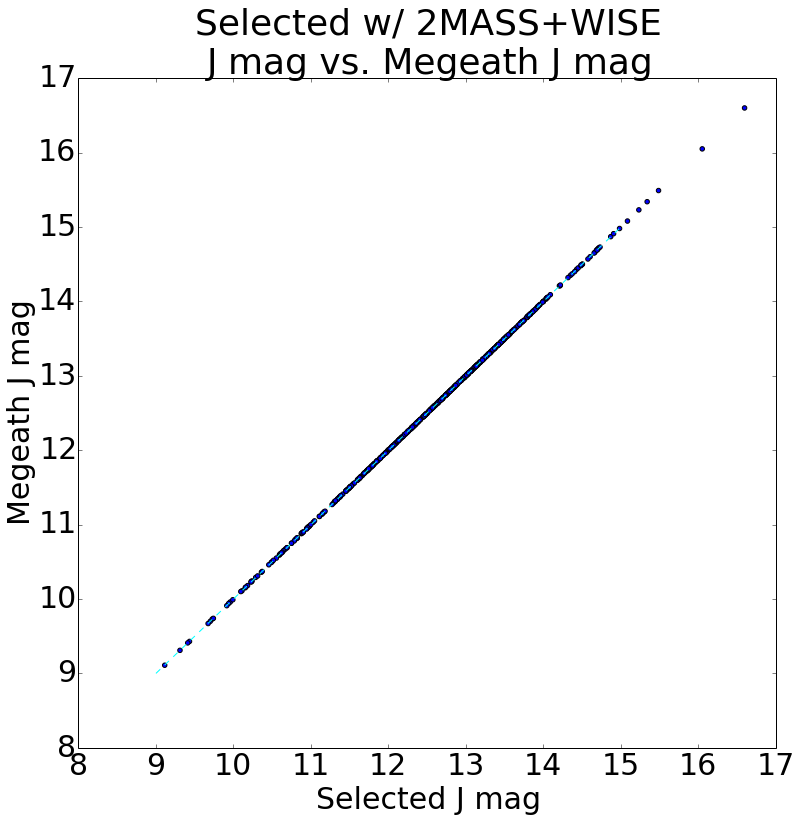

In [76]:
#sanity check, graph the 2MASS magnitudes from Megeath vs. those from Koenig selected 
#for matched sources. 

#to ensure that the Koenig vs Megeath type plots are comparing the same stars, the indices
#of the matches need to be sorted with respect to RA. This enables the plots to be made of 
#the sorted arrays matching the correct stars together in x and y. Megeath is already sorted
#by RA so only the Koenig indices need to be sorted.
sort1k = np.argsort(Koenig['ra'][KoenigMag][Kclass1Megeath])
sort2k = np.argsort(Koenig['ra'][KoenigMag][Kclass2Megeath])

plt.scatter(Koenig['j_m_2mass'][KoenigMag][Kclass1Megeath][sort1k], Megeath['Jmag'][MegeathI][Mclass1Koenig])
plt.scatter(Koenig['j_m_2mass'][KoenigMag][Kclass2Megeath][sort2k], Megeath['Jmag'][MegeathII][Mclass2Koenig])
fig = plt.gcf()
#plt.xlim(8, 15)
#plt.ylim(8, 15)
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)

plt.xlabel('Selected J mag')
plt.ylabel('Megeath J mag')
plt.title('Selected w/ 2MASS+WISE\nJ mag vs. Megeath J mag')
#plt.annotate('Ew.', xy=(12.5, 12.75), color = '#74d600', fontsize = 65)
plt.plot([9,15], [9,15], color = 'cyan', linestyle = 'dashed')

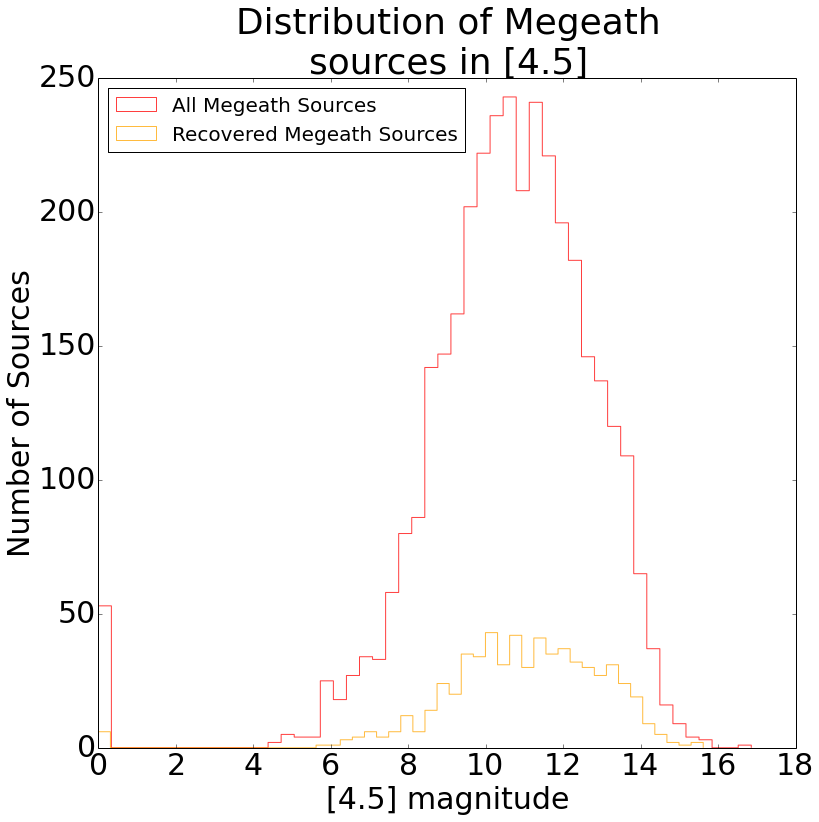

In [95]:
#Make histograms of various Megeath magnitudes to compare the distributions of the entire
#catalog verus various subsets, those without [8.0], those that have Koenig counterparts, etc.
s1=[] 
index = []
allRecovered = []
for i in Mclass1Koenig:
    allRecovered.append(i)
for i in Mclass2Koenig:
    allRecovered.append(i)
    
#unmask the values so we can see how many do not have measurements (masked values are then read as 0.0)     
for i in range(len(Megeath['[4.5]'].mask)):
    if Megeath['[4.5]'].mask[i]:
        Megeath['[4.5]'].mask[i] = False

#convert all values from strings to floats so they are compatible with plt.hist
for i in range(len(Megeath)):
    if i > 2:
        s1.append(float(Megeath['[4.5]'][i]))
        index.append(i)
s1= np.array(s1)
        
plt.hist(s1, bins = 50, histtype = 'step', alpha = 0.75, color = 'red')
plt.hist(s1[allRecovered], bins = 50, histtype = 'step', alpha = 0.75, color = 'orange')

plt.xlabel('[4.5] magnitude')
plt.legend(('All Megeath Sources', 'Recovered Megeath Sources'), loc = 2, fontsize = 20)
plt.ylabel('Number of Sources')
plt.title('Distribution of Megeath\nsources in [4.5]')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)

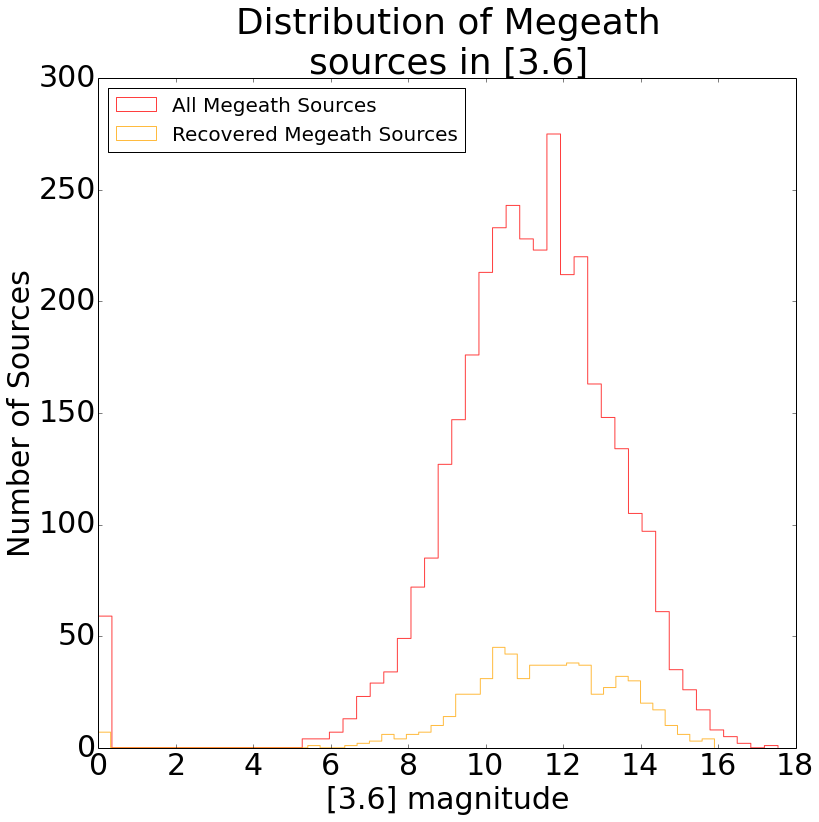

In [82]:
#Make histograms of various Megeath magnitudes to compare the distributions of the entire
#catalog verus various subsets, those without [8.0], those that have Koenig counterparts, etc.
s1=[] 
index = []
allRecovered = []
for i in Mclass1Koenig:
    allRecovered.append(i)
for i in Mclass2Koenig:
    allRecovered.append(i)
#unmask the values so we can see how many do not have measurements (masked values are then read as 0.0)        
for i in range(len(Megeath['[3.6]'].mask)):
    if Megeath['[3.6]'].mask[i]:
        Megeath['[3.6]'].mask[i] = False

        
#convert all values from strings to floats so they are compatible with plt.hist
for i in range(len(Megeath)):
    if i > 2:
        s1.append(float(Megeath['[3.6]'][i]))
        index.append(i)
s1= np.array(s1)
        
plt.hist(s1, bins = 50, histtype = 'step', alpha = 0.75, color = 'red')
plt.hist(s1[allRecovered], bins = 50, histtype = 'step', alpha = 0.75, color = 'orange')

plt.xlabel('[3.6] magnitude')
plt.legend(('All Megeath Sources', 'Recovered Megeath Sources'), loc = 2, fontsize = 20)
plt.ylabel('Number of Sources')
plt.title('Distribution of Megeath\nsources in [3.6]')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)
#fig.savefig('../../KoenigSelectedCatalogs/Orion/Megeath_Spitzer36_hist.pdf')

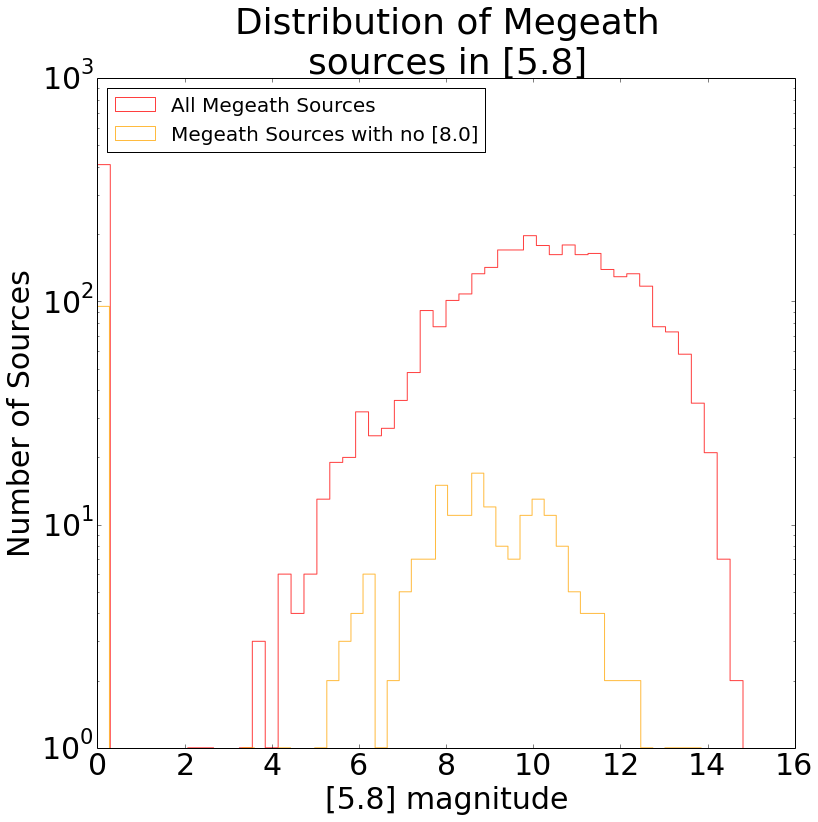

In [69]:
#Make histograms of various Megeath magnitudes to compare the distributions of the entire
#catalog verus various subsets, those without [8.0], those that have Koenig counterparts, etc.
s1=[] 
index = []
allRecovered = []
for i in Mclass1Koenig:
    allRecovered.append(i)
for i in Mclass2Koenig:
    allRecovered.append(i)
#unmask the values so we can see how many do not have measurements (masked values are then read as 0.0)      
for i in range(len(Megeath['[5.8]'].mask)):
    if Megeath['[5.8]'].mask[i]:
        Megeath['[5.8]'].mask[i] = False

        
#convert all values from strings to floats so they are compatible with plt.hist
for i in range(len(Megeath)):
    if i > 2:
        s1.append(float(Megeath['[5.8]'][i]))
        index.append(i)
s1= np.array(s1)
        
plt.hist(s1, bins = 50, histtype = 'step', alpha = 0.75, color = 'red', log = True)
plt.hist(s1[no8], bins = 50, histtype = 'step', alpha = 0.75, color = 'orange', log = True)

plt.xlabel('[5.8] magnitude')
plt.legend(('All Megeath Sources', 'Megeath Sources with no [8.0]'), loc = 2, fontsize = 20)
plt.ylabel('Number of Sources')
plt.ylim(1,1000)
plt.title('Distribution of Megeath\nsources in [5.8]')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)
#fig.savefig('../../KoenigSelectedCatalogs/Orion/Megeath_Spitzer58_hist.pdf')

(1, 500)

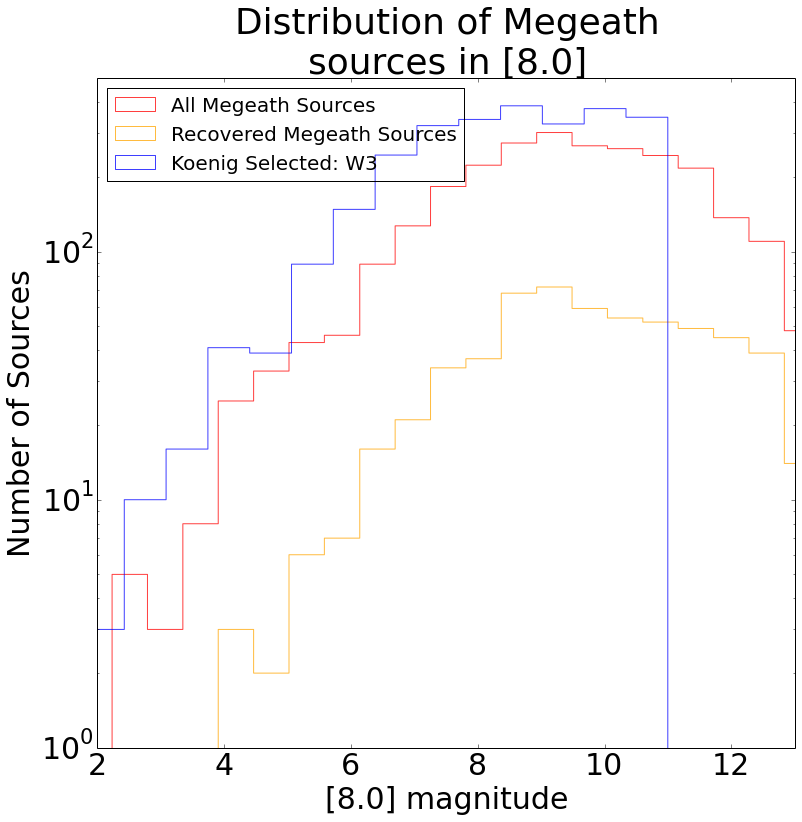

In [26]:
#Make histograms of various Megeath magnitudes to compare the distributions of the entire
#catalog verus various subsets, those without [8.0], those that have Koenig counterparts, etc.
s1=[] 
index = []
allRecovered = []
for i in Mclass1Koenig:
    allRecovered.append(i)
for i in Mclass2Koenig:
    allRecovered.append(i)

none = []
#unmask the values so we can see how many do not have measurements (masked values are then read as 0.0)         
for i in range(len(Megeath['[8.0]'].mask)):
    if Megeath['[8.0]'].mask[i]:
        Megeath['[8.0]'].mask[i] = False
        none.append(i)
        

#convert all values from strings to floats so they are compatible with plt.hist        
for i in range(len(Megeath)):
    if i > 2:
        s1.append(float(Megeath['[8.0]'][i]))
        index.append(i)
s1= np.array(s1)
        
plt.hist(s1, bins = 25, histtype = 'step', alpha = 0.75, color = 'red', log = True)
plt.hist(s1[allRecovered], bins = 25, histtype = 'step', alpha = 0.75, color = 'orange', log = True)
plt.hist(Koenig['w3_m'], bins = 25, histtype = 'step', alpha = 0.75, color = 'blue', log = True)

plt.xlabel('[8.0] magnitude')
plt.legend(('All Megeath Sources', 'Recovered Megeath Sources', 'Koenig Selected: W3'), loc = 2, fontsize = 20)
plt.ylabel('Number of Sources')
plt.title('Distribution of Megeath\nsources in [8.0]')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)
plt.xlim(2,13)
plt.ylim(1,500)
#fig.savefig('../../KoenigSelectedCatalogs/Orion/Megeath_Spitzer8_hist.pdf')

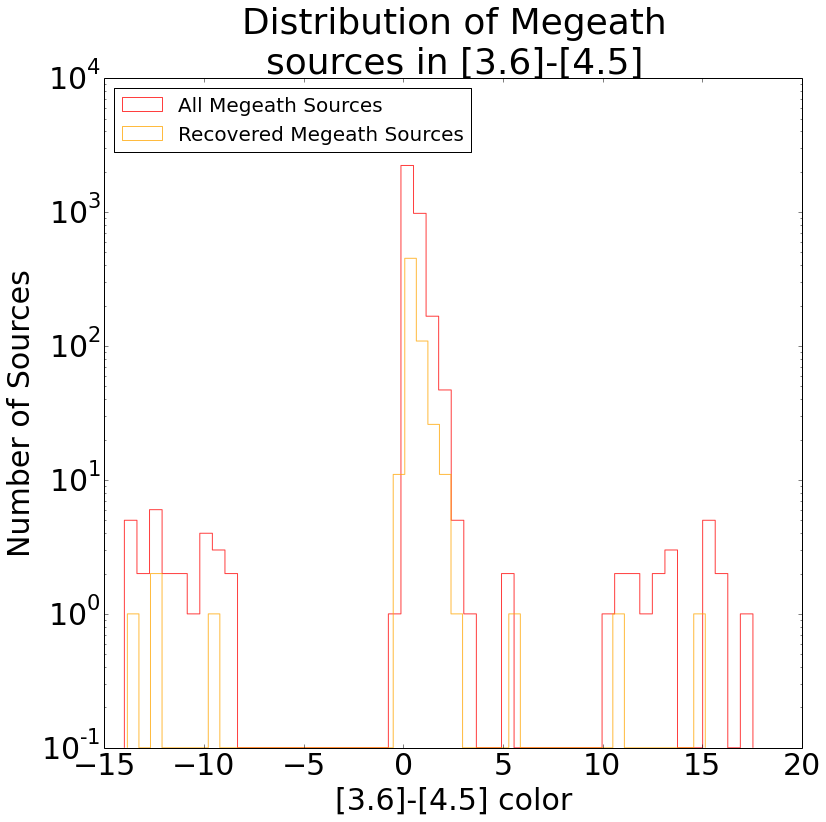

In [98]:
s1=[] 
index = []
allRecovered = []
for i in Mclass1Koenig:
    allRecovered.append(i)
for i in Mclass2Koenig:
    allRecovered.append(i)
#unmask the values so we can see how many do not have measurements (masked values are then read as 0.0)     
for i in range(len(Megeath['[3.6]'].mask)):
    if Megeath['[3.6]'].mask[i]:
        Megeath['[3.6]'].mask[i] = False
        
for i in range(len(Megeath['[4.5]'].mask)):
    if Megeath['[4.5]'].mask[i]:
        Megeath['[4.5]'].mask[i] = False
        

#convert all values from strings to floats so they are compatible with plt.hist
for i in range(len(Megeath)):
    if i > 2:
        s1.append(float(Megeath['[3.6]'][i])-float(Megeath['[4.5]'][i]))
        index.append(i)
s1= np.array(s1)
        
plt.hist(s1, bins = 50, histtype = 'step', alpha = 0.75, color = 'red', log = True)
plt.hist(s1[allRecovered], bins = 50, histtype = 'step', alpha = 0.75, color = 'orange', log = True)

plt.xlabel('[3.6]-[4.5] color')
plt.legend(('All Megeath Sources', 'Recovered Megeath Sources'), loc = 2, fontsize = 20)
plt.ylabel('Number of Sources')
plt.title('Distribution of Megeath\nsources in [3.6]-[4.5]')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)
#fig.savefig('../../KoenigSelectedCatalogs/Orion/Megeath_color_hist.pdf')

In [16]:
#Megeath sources that have a nearest neighbor within 3 arc seconds
from matchCatalog import matchCatalog
c1 = SkyCoord(Megeath['_RAJ2000'][2:], Megeath['_DEJ2000'][2:], unit = 'deg')
matches, dist = matchCatalog(c1,c1, 3.0, True)
print matches
dist

[ 202  201  247  245  792  791 1286 1285 1378 1377 1499 1498 1603 1598 1968
 1965 2339 2337 2419 2418 2767 2766 2957 2956 3086 3085]


array([ 2.62343344,  2.62343344,  1.95522056,  1.95522056,  2.79167519,
        2.79167519,  1.3063132 ,  1.3063132 ,  1.54009757,  1.54009757,
        1.49861306,  1.49861306,  2.9385293 ,  2.9385293 ,  2.56271723,
        2.56271723,  2.83351942,  2.83351942,  2.39189798,  2.39189798,
        2.79318861,  2.79318861,  1.97628093,  1.97628093,  2.62246546,
        2.62246546])

In [17]:
#Megeath sources that have a nearby neighbors within 3.0 arcseconds
nearbyNeighbors = []
c1 = SkyCoord(Megeath['_RAJ2000'][2:], Megeath['_DEJ2000'][2:], unit = 'deg')

#run through Megeath catalog finding a list of the separations to all other sources from 
#each source.
for i in range(len(Megeath)-2):
    special = c1[i]
    notSpecial = c1
    
    sep = special.separation(notSpecial)
    nearbyNeighbors.append(sep.arcsecond)
    
    
#run through list of separations for each source, find the number of neighbors for
#each source that are within the required radius.
neighborCount = []
meetReq = []
for i in range(len(nearbyNeighbors)):
    neighbors = 0 
    for j in range(len(nearbyNeighbors[i])):
        if nearbyNeighbors[i][j] > 0.0 and nearbyNeighbors[i][j] < 3.0:
            meetReq.append(i)
            neighbors = neighbors +1 
    neighborCount.append(neighbors)
    
meh = np.array(neighborCount)
print 'Number of sources with neighbors within 3 arcseconds:', len(meetReq)
print 'List of number of neighbors that are within 3 arcseconds:', meh[meetReq]

Number of sources with neighbors within 3 arcseconds: 26
List of number of neighbors that are within 3 arcseconds: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


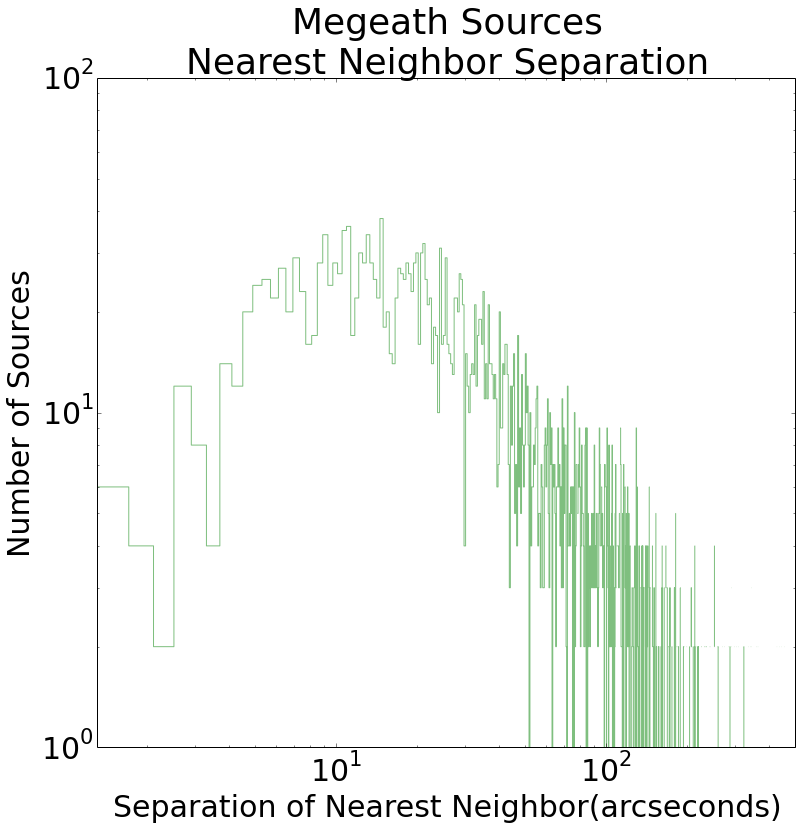

In [19]:
#histogram of all nearest neighbor separations for Megeath catalog
indx, dist, dist3d = c1.match_to_catalog_sky(c1, 2)


plt.hist(dist.arcsecond, alpha = 0.5, color = 'green', bins = 15000, histtype = 'step')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0,500)
plt.xlabel('Separation of Nearest Neighbor(arcseconds)')
plt.ylabel('Number of Sources')
plt.title('Megeath Sources \nNearest Neighbor Separation')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)
#fig.savefig('../../KoenigSelectedCatalogs/Orion/Megeath_nearest_neighbor_separation.pdf')

In [150]:
#find sources that are within 10 < K 12 but are not found by Koenig. To visually inspect
#in Ipac. Picks sources, then tests if they are within the right range, AND not found already.

testSources = [2601, 8, 386, 388, 866, 1044, 3270, 1738, 1001, 
               1010, 2481, 2515, 3306, 3292, 992, 965, 1777, 1747,
              1402, 1622, 1593, 1855, 1913, 2268, 2363, 2501,
              2612, 3450, 1310, 1666, 1853, 1992, 2118, 2530, 2538, 
              961, 657, 713, 2637, 2648, 3239, 942, 1671, 
              1965, 1973, 1956, 2099, 2385, 2706, 940]

#for i in MegeathMag:
    #if i > 2:
        #if float(Megeath['Kmag'][i]) > 10.0 and float(Megeath['Kmag'][i]) < 12.0:
            #print i

for i in Mclass1Koenig:
    if i > 2:
        if float(Megeath['Kmag'][i]) > 10.0 and float(Megeath['Kmag'][i]) < 12.0:
            #print i
            for j in testSources:
                if i == j:
                    print 'Cant Use', j

#print 'Class 2:'
for i in Mclass2Koenig:
    if i > 2:
        if float(Megeath['Kmag'][i]) > 10.0 and float(Megeath['Kmag'][i]) < 12.0:
            #print i
            for j in testSources:
                if i == j:
                    print 'Cant Use', j


print len(testSources)

#for i in testSources:
    #print '',Megeath['Cl'][i]


50


#Comparing Nearest Neighbor Distance and Spitzer Magnitudes

In [9]:
megeathWISE = ascii.read('../../OrionCatalogs/megeathWISE.txt')
megeathWISE['ra'].unit = 'deg'
megeathWISE['dec'].unit = 'deg'

from matchCatalog import matchCatalog
c1 = SkyCoord(Megeath['_RAJ2000'][2:], Megeath['_DEJ2000'][2:], unit = 'deg')
c2 = SkyCoord(megeathWISE['ra'], megeathWISE['dec'], unit='deg')

matches, distances = matchCatalog(c2, c1, 3.0, False)
indx, dist, dist3d = c1.match_to_catalog_sky(c1, 2)

#unmask the values so we can see how many do not have measurements (masked values are then read as 0.0)         
for i in range(len(Megeath['[4.5]'].mask)):
    if Megeath['[4.5]'].mask[i]:
        Megeath['[4.5]'].mask[i] = False

2470
3481


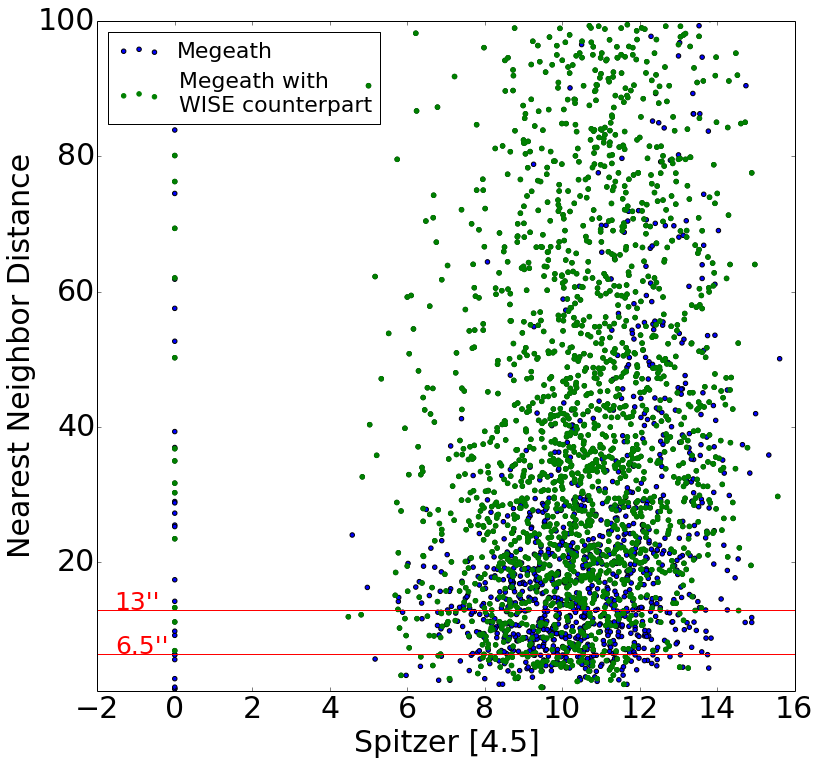

In [15]:
plt.scatter(Megeath['[4.5]'][2:], dist.arcsecond)
plt.scatter(Megeath['[4.5]'][2:][matches], dist.arcsecond[matches], color = 'green')
#plt.scatter(Megeath['[4.5]'][2:][matches], dist[matches].arcsecond, color = 'green')
plt.ylim(1, 100)
plt.xlim(-2, 16)

plt.legend(('Megeath', 'Megeath with \nWISE counterpart'), loc = 2, fontsize = 22)

plt.plot([-2, 16], [6.5, 6.5], color = 'red')
plt.plot([-2, 16], [13, 13], color = 'red')
plt.annotate("6.5''", xy = (-1.5, 6.5), color = 'red', fontsize = 25)
plt.annotate("13''", xy = (-1.5, 13), color = 'red', fontsize = 25)


#plt.title('Nearest Neighbor Distance \nvs. Spitzer [4.5]')
plt.xlabel('Spitzer [4.5]')
plt.ylabel('Nearest Neighbor Distance')

fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)
print len(matches)
print len(Megeath)
#plt.savefig('../../OrionCatalogs/Megeath_Near_Neighbors_noTitle.pdf')

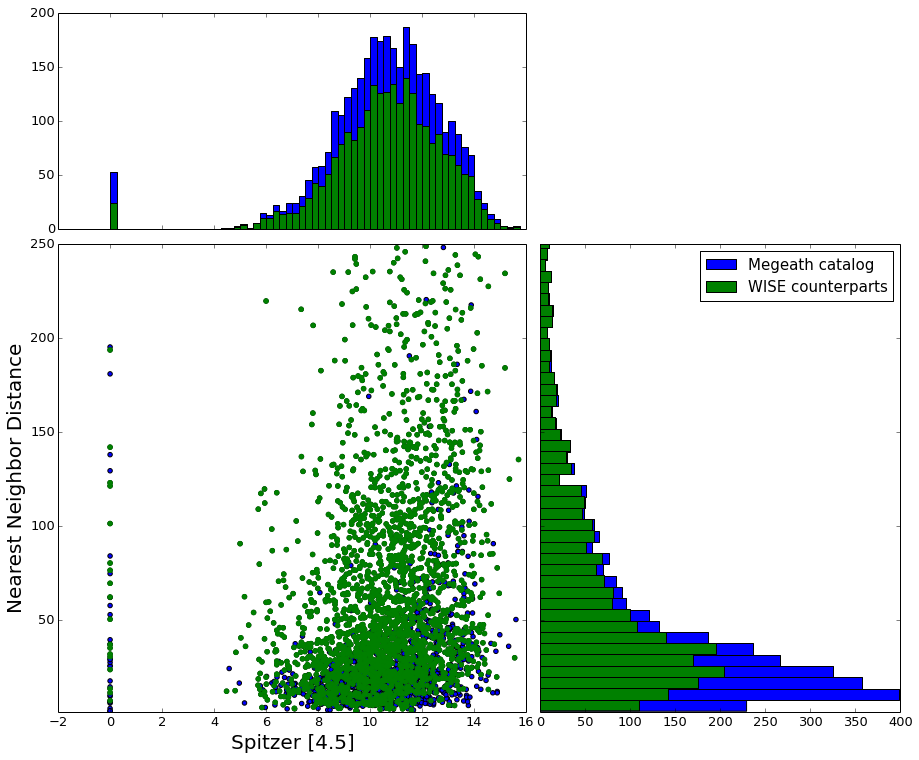

In [43]:
x = []   
y = []
for i in range(len(dist.arcsecond)):
    if dist.arcsecond[i] < 1000:
        x.append(float(Megeath['[4.5]'][2:][i]))
        y.append(float(dist.arcsecond[i]))
    
    
x2 = []   
y2 = []
for i in matches:
    if dist.arcsecond[i] < 1000:
        x2.append(float(Megeath['[4.5]'][2:][i]))
        y2.append(float(dist.arcsecond[i]))
        
        
from matplotlib.ticker import NullFormatter
plt.rc('font', size = 13)
# the random data
x = np.array(x)
y = np.array(y)

x2 = np.array(x2)
y2 = np.array(y2)

nullfmt   = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.3]
rect_histy = [left_h, bottom, 0.5, height]

# start with a rectangular Figure
plt.figure(1, figsize=(10,10))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)
axScatter.scatter(x2, y2 ,color = 'green')

# now determine nice limits by hand:
binwidth = 0.25
#xymax = 500
xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
lim = ( int(xymax/binwidth) + 1) * binwidth

#plt.ylim(-10, 100)
#plt.xlim(-2, 16)
axScatter.set_xlim( (-2, 16) )
axScatter.set_ylim( (1, 250) )
axScatter.set_ylabel('Nearest Neighbor Distance', fontsize = 20)
axScatter.set_xlabel('Spitzer [4.5]', fontsize = 20)



bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins, color = 'blue')
axHisty.hist(y, bins=150, orientation='horizontal')
#axHistx.set_title('Nearest Neighbor Distance \nvs. Spitzer [4.5]', fontsize = 20)

axHistx.hist(x2, bins =bins, color = 'green')
axHisty.hist(y2, bins = 150, orientation='horizontal')
axHisty.legend(('Megeath catalog', 'WISE counterparts'), fontsize = 15)

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

plt.show()

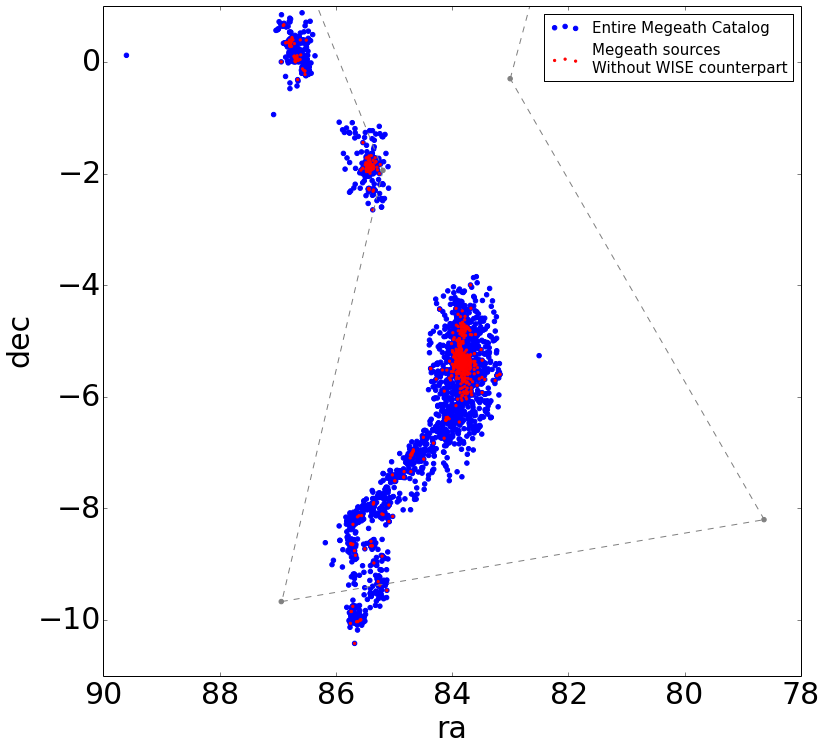

In [36]:
#inWise = np.equal(matches, range(len(Megeath)))
notWISE = []
for i in range(len(Megeath[2:])):
    if i not in matches:
        notWISE.append(i)

plt.scatter(Megeath['_RAJ2000'][2:], Megeath['_DEJ2000'][2:], marker = 'o', color = 'blue')
plt.scatter(Megeath['_RAJ2000'][2:][notWISE], Megeath['_DEJ2000'][2:][notWISE], color = 'red', marker = '.')
plt.legend(('Entire Megeath Catalog', 'Megeath sources \nWithout WISE counterpart'), loc = 1, fontsize = 15)

#Orion pointer stars
plt.scatter([88.792939, 78.634467, 81.282763, 83.001667, 85.189694, 86.939120], 
            [7.407064, -8.201638, 6.349703, -0.299095,  -1.942574, -9.669605], color = 'grey')
plt.plot([88.79,85.189], [7.407, -1.9425], color = 'grey', linestyle = 'dashed')
plt.plot([85.189,86.93], [-1.9425, -9.669], color = 'grey', linestyle = 'dashed')
plt.plot([86.93, 78.63], [ -9.669, -8.2016], color = 'grey', linestyle = 'dashed')
plt.plot([78.63, 83.00], [  -8.2016, -0.299], color = 'grey', linestyle = 'dashed')
plt.plot([83.00, 81.28], [ -0.299, 6.34], color = 'grey', linestyle = 'dashed')
plt.plot([ 81.28, 88.79], [ 6.34, 7.407], color = 'grey', linestyle = 'dashed')

#plt.xlim(85 ,83)
#plt.ylim(-6, -4)
plt.xlim(90 ,78)
plt.ylim(-11, 1)
plt.xlabel('ra')
plt.ylabel('dec')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)

#fig.savefig('../../OrionCatalogs/Megeath_spatial_noWISEcounterparts.pdf')